# Figure 012 (v001)

Correlation of cancer genes.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import janitor  # noqa: F401
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from speclet.io import figure_img_file, tables_dir
from speclet.plot import PlottingMode, set_speclet_theme

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
set_speclet_theme(PlottingMode.DISSERTATION)
np.random.seed(0)

In [5]:
FIGNUM, VERSION = 12, 1
FIGURE_FILE = figure_img_file(FIGNUM, VERSION, "correlation-of-crc-cancer-genes")
FIGURE_FILE

PosixPath('/n/data1/hms/dbmi/park/Cook/speclet/figures/figure_012-v001/fig_012-v001_correlation-of-crc-cancer-genes.png')

In [6]:
nb_dir = tables_dir() / "100_120_cancer-gene-comut-analysis"

### Data

In [7]:
crc_h_draws = pd.read_csv(nb_dir / "kras-pik3ca-correlated-genes.csv")
crc_mutations = pd.read_csv(nb_dir / "kras-pik3ca-mutations-colorectal.csv")

## Figure

### Shared

In [8]:
FIGSIZE = (6.5, 4)
figure = plt.figure(constrained_layout=True, figsize=FIGSIZE)
subfigures = figure.subfigures(nrows=2, ncols=1, height_ratios=(3, 1))

panel_a, panel_c = subfigures[0].subfigures(ncols=2, width_ratios=(3, 2))
panel_b = subfigures[1]

<Figure size 650x400 with 0 Axes>

### a. Draws from MCMC for KRAS and PIK3CA comutation variables

In [9]:
panel_a.clear()
panel_a.text(0, 0.98, "a", fontsize=8, fontweight="bold")
axes = panel_a.subplots(nrows=2, ncols=2)
for ax, (gene, draws_gene) in zip(axes.flatten(), crc_h_draws.groupby("hugo_symbol")):
    ax.set_title(gene, fontstyle="italic", size=6)
    plot_df = draws_gene.copy().astype({"chain": "str"}).sample(frac=1, random_state=34)
    sns.scatterplot(
        data=plot_df,
        x="KRAS",
        y="PIK3CA",
        hue="chain",
        ax=ax,
        s=2,
        alpha=0.7,
        edgecolor=None,
        legend=False,
    )
    ax.set_xlabel(None)
    ax.set_ylabel(None)

panel_a.supxlabel("KRAS", fontstyle="italic", fontsize=6)
panel_a.supylabel("PIK3CA", fontstyle="italic", fontsize=6)

Text(0.02, 0.5, 'PIK3CA')

### b. Cancer gene mutations

In [10]:
panel_b.clear()
panel_b.text(0, 0.98, "b", fontsize=8, fontweight="bold")
ax = panel_b.subplots()

crc_mut_X = crc_mutations.pivot_wider(
    "hugo_symbol", names_from="depmap_id", values_from="is_mutated"
).set_index("hugo_symbol")

vals = np.arange(1, crc_mut_X.shape[0] + 1)[::-1]
vals = np.hstack([vals[:, None] for _ in range(crc_mut_X.shape[1])])
scores = ((vals * crc_mut_X.values) ** 2).sum(axis=0)
crc_mut_X = crc_mut_X.iloc[:, np.argsort(-1 * scores)]

sns.heatmap(crc_mut_X, cmap="Greys", square=True, cbar=False, ax=ax)

for i in range(crc_mut_X.shape[1] + 1):
    ax.axvline(i, c="tab:grey", lw=0.5)
for i in range(crc_mut_X.shape[0] + 1):
    ax.axhline(i, c="tab:grey", lw=0.5)

ax.set_yticklabels(crc_mut_X.index.tolist(), fontstyle="italic")
ax.set_xticklabels([])
ax.set_ylabel(None)
ax.set_xlabel("cell line")

Text(0.5, -2.8745673177081574, 'cell line')

### c. Correlation of cancer gene mutations

In [11]:
panel_c.clear()
panel_c.text(0, 0.98, "c", fontsize=8, fontweight="bold")
ax = panel_c.subplots()

crc_mut_corr = crc_mutations.pivot_wider(
    "depmap_id", names_from="hugo_symbol", values_from="is_mutated"
).corr()
sns.heatmap(
    crc_mut_corr,
    cmap="seismic",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"label": "correlation", "location": "bottom"},
    annot=crc_mut_corr.round(2),
    ax=ax,
)
ax.set_xticklabels(crc_mut_corr.columns, fontstyle="italic")
ax.set_yticklabels(crc_mut_corr.index.tolist(), fontstyle="italic")
ax.set_xlabel(None)
ax.set_ylabel(None)

Text(394.38646458333324, 0.5, '')

## Saving

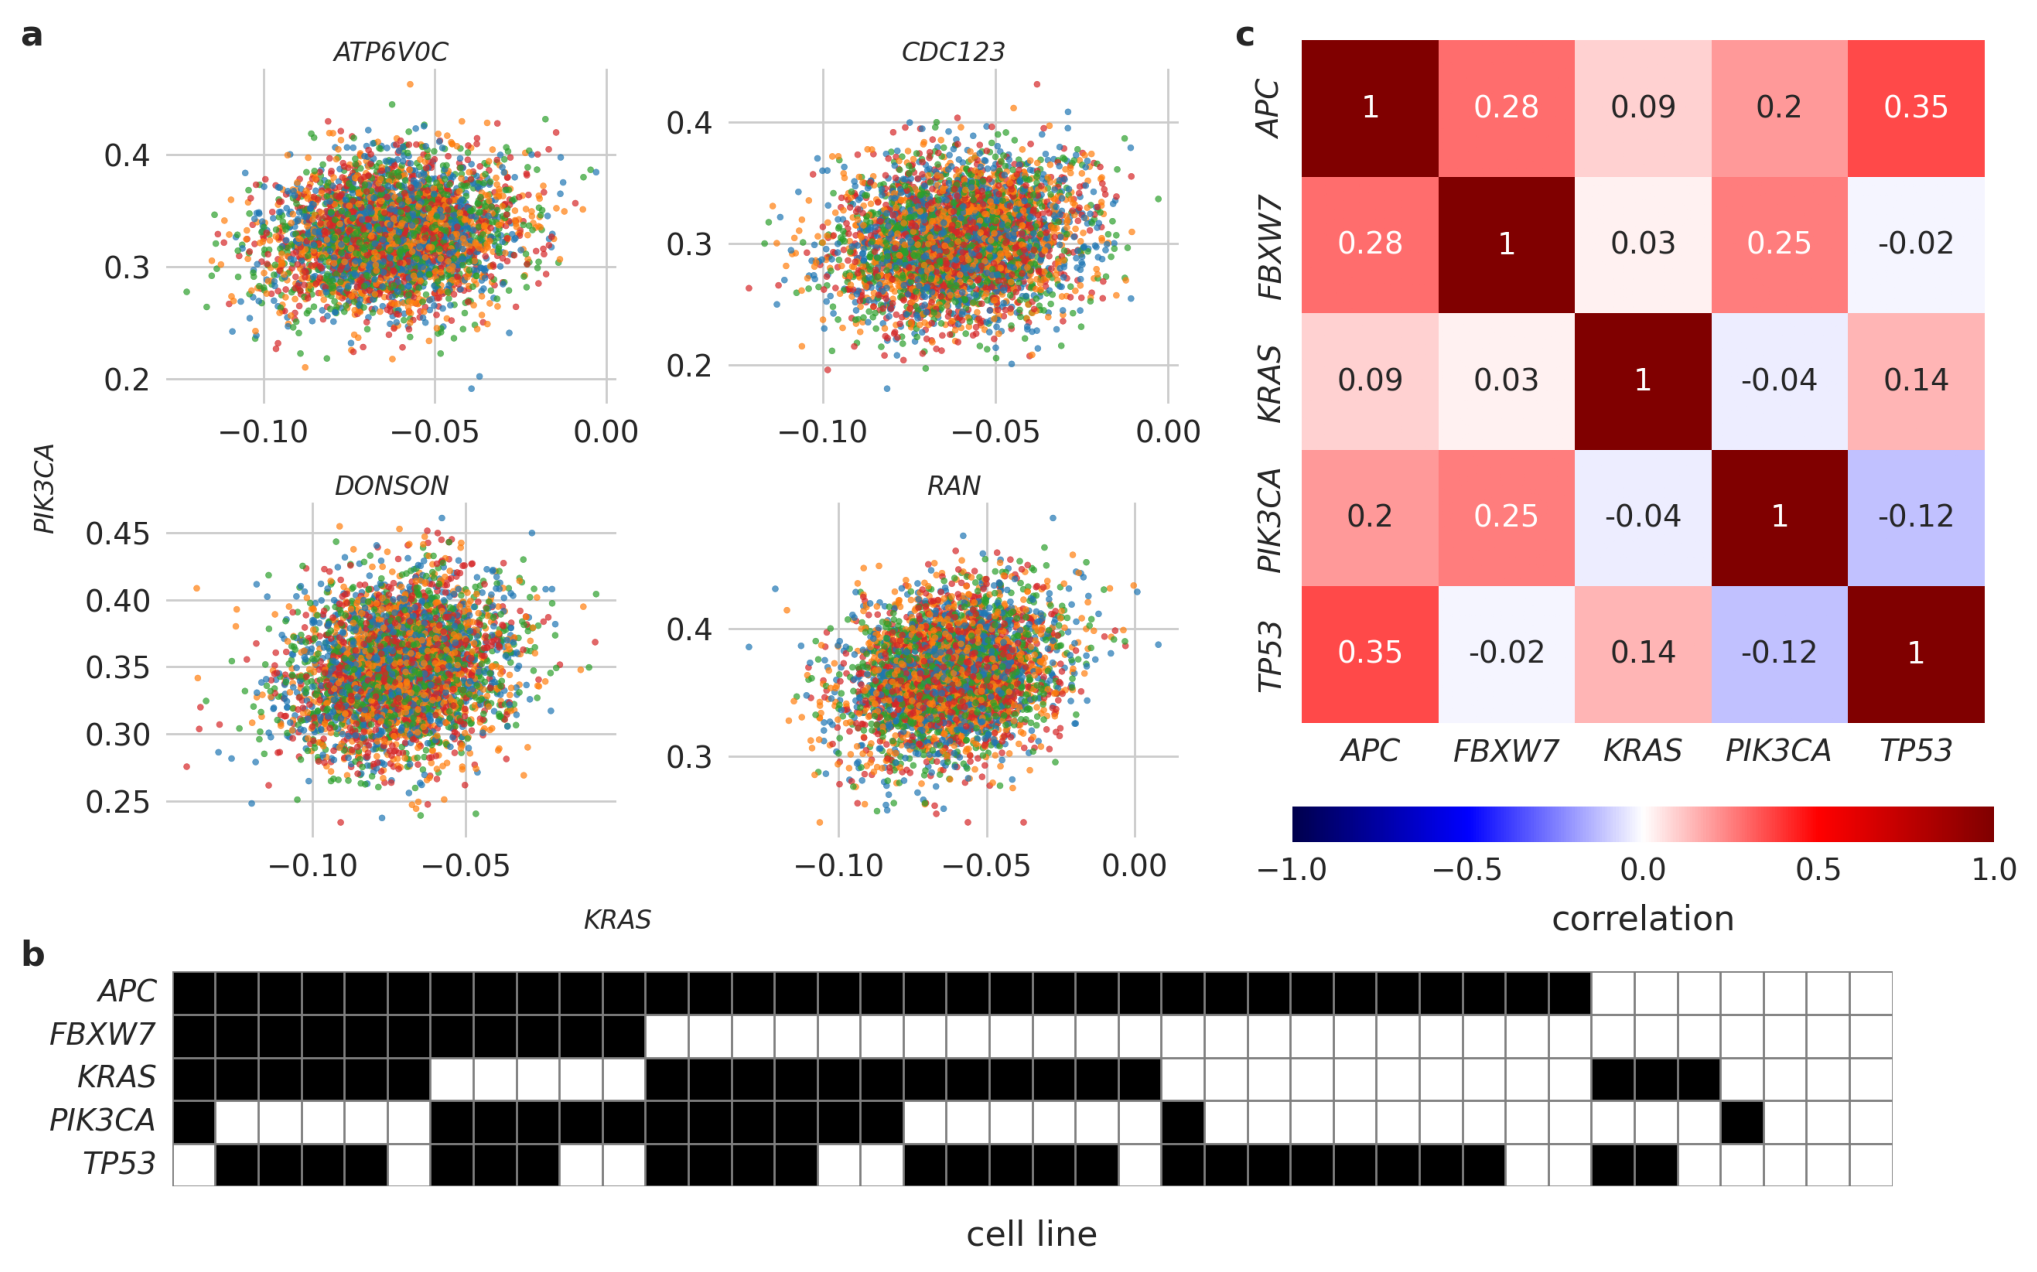

In [12]:
figure.savefig(FIGURE_FILE, dpi=400, pad_inches=0, bbox_inches="tight")

_, ax = plt.subplots(figsize=[x * 2 for x in FIGSIZE])
ax.imshow(plt.imread(FIGURE_FILE))
ax.axis("off")
plt.show()

---

## Session Info

In [13]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-10-08

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 3.10.0-1160.76.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 28
Architecture: 64bit

Hostname: compute-e-16-233.o2.rc.hms.harvard.edu

Git branch: figures

pandas    : 1.4.4
numpy     : 1.23.3
matplotlib: 3.5.3
janitor   : 0.22.0
seaborn   : 0.11.2

